Text(0.5, 1.0, 'Grayscaled image')

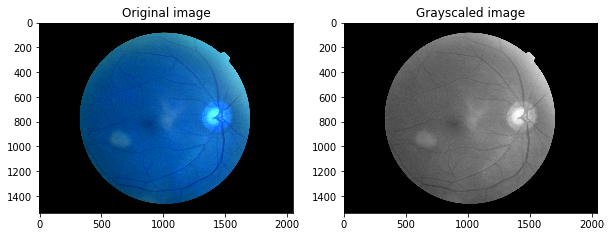

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/retinopaty.png')
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')

fig.add_subplot(1, 2, 2)
plt.imshow(img_grayscale, cmap=plt.cm.gray)
plt.title('Grayscaled image')

### Contrast encreasing

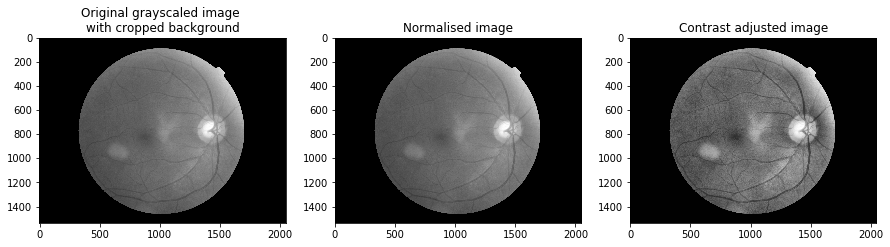

In [20]:
# 1. Thresholding using cv2.THRESH_OTSU to isolate the circular colored image of the 
# retina
ret, otsu_thresholded = cv2.threshold(img_grayscale, 0, 255, cv2.THRESH_OTSU)

# Cropp image background
img_with_cropped_bg = cv2.bitwise_and(img_grayscale, otsu_thresholded)

# 2. Normalising image by subtracting the minimum pixel intensity from each channel 
# and dividing by the mean pixel intensity to represent pixels in the range 0 to 1
img_normalized = np.zeros(img_with_cropped_bg.shape)
img_normalized = cv2.normalize(img_with_cropped_bg,  img_normalized, 0, 255, cv2.NORM_MINMAX)

# 3. Contrast adjustment using the contrast limited adaptive histogram equalization 
# (CLAHE) filtering algorithm
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
histogram_norm_img = clahe.apply(img_normalized)

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.title('Original grayscaled image \nwith cropped background')
plt.imshow(img_with_cropped_bg, cmap=plt.cm.gray)
fig.add_subplot(1, 3, 2)
plt.title('Normalised image')
plt.imshow(img_normalized, cmap=plt.cm.gray)
fig.add_subplot(1, 3, 3)
plt.title('Contrast adjusted image')
plt.imshow(histogram_norm_img, cmap=plt.cm.gray)

### Image denoising

Text(0.5, 1.0, 'Median bluring')

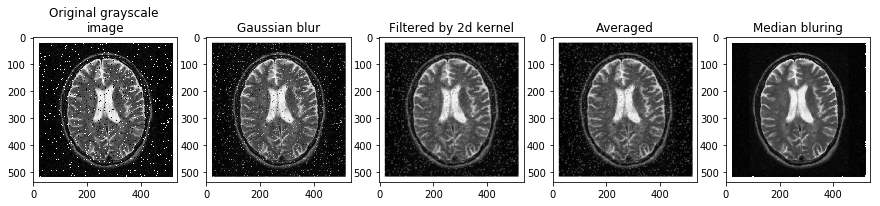

In [37]:
noicy_img = cv2.imread('./images/noisy_brain.jpg')
noicy_img_grayscale = cv2.cvtColor(noicy_img, cv2.COLOR_BGR2GRAY)

# Use GaussianBlur
noicy_img_blured = cv2.GaussianBlur(noicy_img_grayscale, (3, 3), 0)

# Use 2d kernel
kernel = np.ones((5,5),np.float32)/25
noicy_img_wth_kernel = cv2.filter2D(noicy_img,-1,kernel)

# Use averaging
noicy_img_averaged = cv2.blur(noicy_img_grayscale, (5,5))

# Use median bluring
noicy_img_median_blured = cv2.medianBlur(noicy_img_grayscale, 5)

fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 5, 1)
plt.imshow(noicy_img_grayscale, cmap=plt.cm.gray)
plt.title('Original grayscale \nimage')

fig.add_subplot(1, 5, 2)
plt.imshow(noicy_img_blured, cmap=plt.cm.gray)
plt.title('Gaussian blur')

fig.add_subplot(1, 5, 3)
plt.imshow(noicy_img_wth_kernel, cmap=plt.cm.gray)
plt.title('Filtered by 2d kernel')

fig.add_subplot(1, 5, 4)
plt.imshow(noicy_img_averaged, cmap=plt.cm.gray)
plt.title('Averaged')

fig.add_subplot(1, 5, 5)
plt.imshow(noicy_img_median_blured, cmap=plt.cm.gray)
plt.title('Median bluring')

### Extended RMP

Text(0.5, 1.0, 'Cropped image')

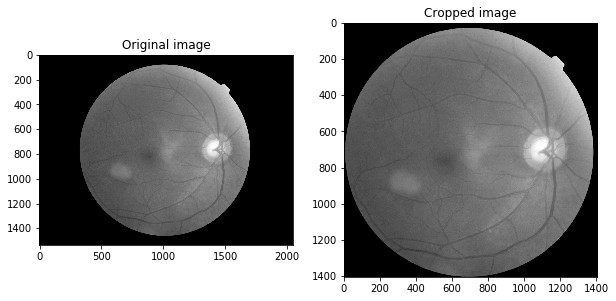

In [83]:
img = cv2.imread('./images/retinopaty.png')
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img_grayscale, 0, 255, cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, 1, 2)

cnt = max(contours, key = cv2.contourArea)

(x,y), radius = cv2.minEnclosingCircle(cnt)
x = int(x); y = int(y)
center = (x, y)
radius = int(radius)

c = cv2.circle(img, center, radius,(0,255,0), 10)
crop_img = img_grayscale[y - radius:y + radius, x - radius:x + radius]

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img_grayscale, cmap=plt.cm.gray)
plt.title('Original image')

fig.add_subplot(1, 2, 2)
plt.imshow(crop_img, cmap=plt.cm.gray)
plt.title('Cropped image')

In [108]:
cols, rows = tuple(crop_img.shape)
n = 12
kernel = np.ones((1,5),np.uint8)
images = []

for i in range (1, n + 1):
    M_cw = cv2.getRotationMatrix2D((cols / 2, rows / 2), i, 1)
    rotated = cv2.warpAffine(crop_img, M_cw, (cols,rows))
    opened = cv2.morphologyEx(crop_img, cv2.MORPH_OPEN, kernel)
    M_acw = cv2.getRotationMatrix2D((cols / 2, rows / 2), -i, 1)
    opened_rotated = cv2.warpAffine(crop_img, M_acw, (cols,rows))
    images.append(opened_rotated)

In [127]:
res = np.zeros(crop_img.shape, dtype=int)
for x in range(0, crop_img.shape[0]):
    for y in range(0, crop_img.shape[1]):
        res[x][y] = max(images, key=lambda im: im[x][y])[x][y]

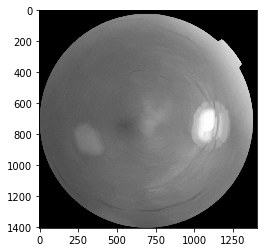

In [128]:
plt.imshow(res, cmap=plt.cm.gray)